In [77]:
# parse
import re
loss_regex = r"Average loss: (\d+\.\d+)"
acc_regex = r"Accuracy: (\d+\/\d+)"
comp_regex = r"Bandwidth savings: from \d+ to \d+ \((\d+\.\d+)x\)"

def parse(file, regex):
    nums = []
    for line in open(file, "r").readlines():
        matches = re.search(regex, line)
        if matches:
            nums.append(float(eval(matches.group(1))))
    return nums

def parse_acc(file):
    return parse(file, acc_regex)

def parse_comp_ratio(file):
    return parse(file, comp_regex)


## Plot Allreduce Baseline vs Decentralized (Bagua) vs RelaySGD (binary tree topology)

In [84]:
from os import listdir
import pandas as pd

data1 = {
    "acc": [],
    "name": []
}

data2 = {
    "acc": [],
    "name": []
}

data3 = {
    "acc": [],
    "name": []
}

files = [file for file in listdir("../logs") if "exp1" in file and "relay" in file and "a-1" in file]
files.sort(reverse=True)

for name in files:
    file = f"../logs/{name}"
    data1["acc"].append(parse_acc(file))

    if "double_binary_trees" in name:
        name = "Double Binary Trees"
    elif "binary_tree" in name:
        name = "Binary Tree"
    elif "chain" in name:
        name = "Chain"

    data1["name"].append(name)

files = [file for file in listdir("../logs") if "exp1" in file and "relay" in file and "a-0.1" in file]
files.sort(reverse=True)

for name in files:
    file = f"../logs/{name}"
    data2["acc"].append(parse_acc(file))

    if "double_binary_trees" in name:
        name = "Double Binary Trees"
    elif "binary_tree" in name:
        name = "Binary Tree"
    elif "chain" in name:
        name = "Chain"

    data2["name"].append(name)

files = [file for file in listdir("../logs") if "exp1" in file and "relay" in file and "a-0.01" in file]
files.sort(reverse=True)

for name in files:
    file = f"../logs/{name}"
    data3["acc"].append(parse_acc(file))

    if "double_binary_trees" in name:
        name = "Double Binary Trees"
    elif "binary_tree" in name:
        name = "Binary Tree"
    elif "chain" in name:
        name = "Chain"

    data3["name"].append(name)
    

df_1 = pd.DataFrame(data1)
df_2 = pd.DataFrame(data2)
df_3 = pd.DataFrame(data3)
df_1

,acc,name
0,"[0.2066, 0.2175, 0.3069, 0.4353, 0.5504, 0.612...",Double Binary Trees
1,"[0.1658, 0.2545, 0.3693, 0.4816, 0.5603, 0.651...",Chain
2,"[0.1671, 0.2203, 0.3247, 0.3515, 0.5052, 0.587...",Binary Tree


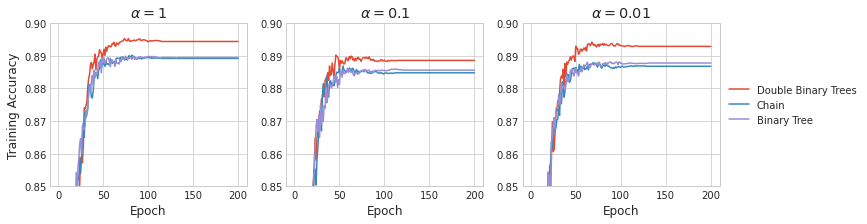

In [88]:
import numpy as np
import matplotlib.pyplot as plt
    
num_epochs = None
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
for i, row in df_1.iterrows():
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=1$")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.ylim(0.85, 0.9)
plt.grid(True)


plt.subplot(1, 3, 2)
for i, row in df_2.iterrows():
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=0.1$")
plt.xlabel("Epoch")
plt.ylim(0.85, 0.9)
plt.grid(True)

ax = plt.subplot(1, 3, 3)
for i, row in df_3.iterrows():
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=0.01$")
plt.xlabel("Epoch")
plt.ylim(0.85, 0.9)
#plt.yscale("log")
plt.grid(True)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0.0)

fig.patch.set_facecolor('white')
fig.savefig('../plots/relay_topologies.png', bbox_inches='tight')
plt.show()

## Plot different topologies of RelaySGD against each other

In [99]:
# Different Topologies
from os import listdir
import pandas as pd

data1 = {
    "acc": [],
    "name": []
}

data2 = {
    "acc": [],
    "name": []
}

data3 = {
    "acc": [],
    "name": []
}

files = [file for file in listdir("../logs") if "exp1" in file and "a-1" in file and (("relay" in file and "double_binary_trees" in file) or "relay" not in file)]
files.sort(reverse=True)

for name in files:
    file = f"../logs/{name}"
    data1["acc"].append(parse_acc(file))

    if "relay" in name:
        name = "RelaySGD"
    elif "allreduce" in name:
        name = "Allreduce Baseline"
    elif "decentralized" in name:
        name = "D-PSGD (Bagua)"

    data1["name"].append(name)

files = [file for file in listdir("../logs") if "exp1" in file and "a-0.1" in file and (("relay" in file and "double_binary_trees" in file) or "relay" not in file)]
files.sort(reverse=True)

for name in files:
    file = f"../logs/{name}"
    data2["acc"].append(parse_acc(file))

    if "relay" in name:
        name = "RelaySGD"
    elif "allreduce" in name:
        name = "Allreduce Baseline"
    elif "decentralized" in name:
        name = "D-PSGD (Bagua)"

    data2["name"].append(name)

files = [file for file in listdir("../logs") if "exp1" in file and "a-0.01" in file and (("relay" in file and "double_binary_trees" in file) or "relay" not in file)]
files.sort(reverse=True)

for name in files:
    file = f"../logs/{name}"
    data3["acc"].append(parse_acc(file))

    if "relay" in name:
        name = "RelaySGD"
    elif "allreduce" in name:
        name = "Allreduce Baseline"
    elif "decentralized" in name:
        name = "D-PSGD (Bagua)"

    data3["name"].append(name)
    

df_1 = pd.DataFrame(data1)
df_2 = pd.DataFrame(data2)
df_3 = pd.DataFrame(data3)
df_3

,acc,name
0,"[0.1885, 0.2872, 0.356, 0.4954, 0.5969, 0.6395...",RelaySGD
1,"[0.1786, 0.1992, 0.2174, 0.2037, 0.1601, 0.197...",D-PSGD (Bagua)
2,"[0.1578, 0.2046, 0.2091, 0.3687, 0.4288, 0.518...",Allreduce Baseline


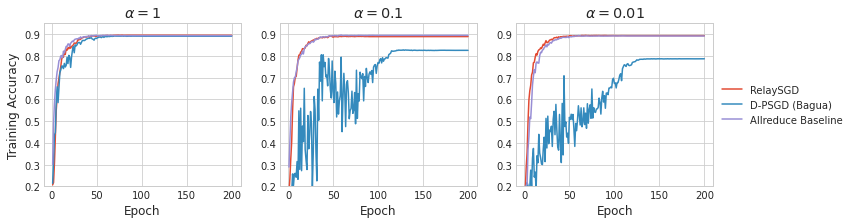

In [112]:
import numpy as np
import matplotlib.pyplot as plt
    
num_epochs = None
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
for i, row in df_1.iterrows():
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=1$")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.ylim(0.2, 0.95)
plt.grid(True)


plt.subplot(1, 3, 2)
for i, row in df_2.iterrows():
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=0.1$")
plt.xlabel("Epoch")
plt.ylim(0.2, 0.95)
plt.grid(True)

ax = plt.subplot(1, 3, 3)
for i, row in df_3.iterrows():
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=0.01$")
plt.xlabel("Epoch")
plt.ylim(0.2, 0.95)
#plt.yscale("log")
plt.grid(True)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0.0)

fig.patch.set_facecolor('white')
fig.savefig('../plots/algo_comparison.png', bbox_inches='tight')
plt.show()

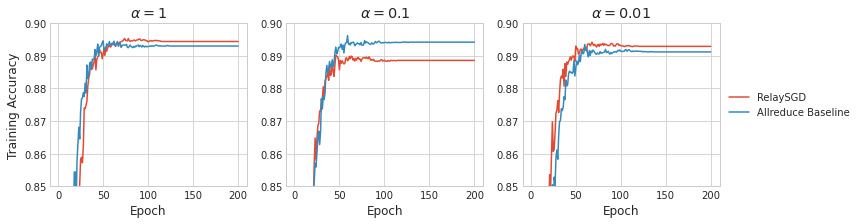

In [111]:
import numpy as np
import matplotlib.pyplot as plt
    
num_epochs = None
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
for i, row in df_1.iterrows():
    if "D-PSGD" in row["name"]: continue
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=1$")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.ylim(0.85, 0.9)
plt.grid(True)


plt.subplot(1, 3, 2)
for i, row in df_2.iterrows():
    if "D-PSGD" in row["name"]: continue
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=0.1$")
plt.xlabel("Epoch")
plt.ylim(0.85, 0.9)
plt.grid(True)

ax = plt.subplot(1, 3, 3)
for i, row in df_3.iterrows():
    if "D-PSGD" in row["name"]: continue
    row_iters = len(row["acc"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["acc"], label=row["name"])

plt.title(r"$\alpha=0.01$")
plt.xlabel("Epoch")
plt.ylim(0.85, 0.9)
#plt.yscale("log")
plt.grid(True)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0.0)

fig.patch.set_facecolor('white')
fig.savefig('../plots/algo_comparison_2.png', bbox_inches='tight')
plt.show()